<a href="https://colab.research.google.com/github/lifeisbeautifu1/learning-pytorch/blob/main/PyTorch_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neural Network Classification with PyTorch

### Getting data for classification

In [152]:
import sklearn

In [153]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [154]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
                         "X2": X[:, 1],
                         "label": y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


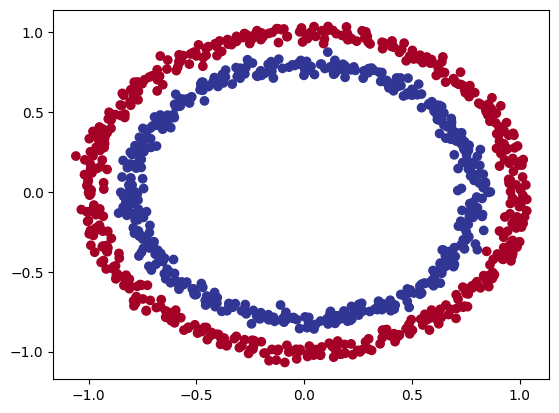

In [155]:
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

In [156]:
X.shape, y.shape

((1000, 2), (1000,))

In [157]:
import torch
from torch import nn
from sklearn import datasets
torch.__version__

'2.0.1+cu118'

In [158]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [159]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [160]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Model

In [161]:
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    self.layer_1 = nn.Linear(in_features=2,
                             out_features=5)
    self.layer_2 = nn.Linear(in_features=5,
                             out_features=1)

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_2(self.layer_1(x))

model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [162]:
device, next(model_0.parameters()).device

('cpu', device(type='cpu'))

In [163]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2,
              out_features=5),
    nn.Linear(in_features=5,
              out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [164]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967],
        [ 0.2968],
        [ 0.1405],
        [ 0.2178],
        [ 0.0805],
        [-0.0284]])

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [165]:
loss_fn = nn.BCEWithLogitsLoss()

In [166]:
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [167]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

### Train the model


In [168]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))
y_logits

tensor([[-3.3758e-02],
        [-3.0925e-02],
        [ 8.9392e-02],
        [-6.9192e-02],
        [ 2.9666e-01],
        [ 2.9679e-01],
        [ 1.4048e-01],
        [ 2.1776e-01],
        [ 8.0462e-02],
        [-2.8445e-02],
        [-6.2729e-02],
        [-2.0969e-02],
        [ 1.8467e-01],
        [ 1.4663e-01],
        [ 5.2323e-02],
        [ 2.3198e-01],
        [ 6.0201e-02],
        [-7.7123e-02],
        [-3.4853e-02],
        [-5.4889e-02],
        [-3.5730e-02],
        [ 2.8576e-01],
        [-2.8304e-02],
        [-8.1063e-02],
        [ 8.1167e-02],
        [ 1.7573e-01],
        [ 2.5394e-01],
        [ 3.1677e-01],
        [ 4.1465e-02],
        [ 1.7662e-01],
        [ 1.2237e-01],
        [ 6.4855e-02],
        [-6.5519e-02],
        [ 2.6689e-01],
        [-7.7007e-02],
        [ 1.1215e-02],
        [-4.3663e-02],
        [ 1.2971e-01],
        [ 2.4701e-01],
        [ 1.6160e-01],
        [-2.9177e-02],
        [ 4.7937e-02],
        [ 6.6640e-02],
        [ 3

In [169]:
y_logits[:5], y_test[:5]

(tensor([[-0.0338],
         [-0.0309],
         [ 0.0894],
         [-0.0692],
         [ 0.2967]]),
 tensor([1., 0., 1., 0., 1.]))

In [170]:
y_pred_probs = torch.sigmoid(y_logits[:5])

torch.round(y_pred_probs[:5])

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]])

In [171]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device)[:5])))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

tensor([True, True, True, True, True])


### Building train and test loop





In [172]:
torch.manual_seed(42)

In [173]:
torch.cuda.manual_seed(42)

In [174]:
epochs = 100

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  y_logits = model_0(X_train).squeeze()

  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()

  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()

    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69796 | Acc: 51.88 | Test loss: 0.69440, Test acc: 58.00%
Epoch: 10 | Loss: 0.69590 | Acc: 51.25 | Test loss: 0.69305, Test acc: 53.00%
Epoch: 20 | Loss: 0.69490 | Acc: 51.62 | Test loss: 0.69254, Test acc: 49.50%
Epoch: 30 | Loss: 0.69435 | Acc: 51.12 | Test loss: 0.69236, Test acc: 49.50%
Epoch: 40 | Loss: 0.69401 | Acc: 50.88 | Test loss: 0.69232, Test acc: 51.00%
Epoch: 50 | Loss: 0.69378 | Acc: 50.25 | Test loss: 0.69234, Test acc: 50.00%
Epoch: 60 | Loss: 0.69362 | Acc: 50.00 | Test loss: 0.69239, Test acc: 51.50%
Epoch: 70 | Loss: 0.69351 | Acc: 50.25 | Test loss: 0.69246, Test acc: 51.00%
Epoch: 80 | Loss: 0.69342 | Acc: 49.88 | Test loss: 0.69254, Test acc: 50.00%
Epoch: 90 | Loss: 0.69336 | Acc: 49.88 | Test loss: 0.69262, Test acc: 53.00%


In [175]:
import requests

from pathlib import Path

if Path('helper_functions.py').is_file():
  print('helper_functions.py already exist')
else:
  print('Download helper_functions.py')
  request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')

  with open('helper_functions.py', 'wb') as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exist


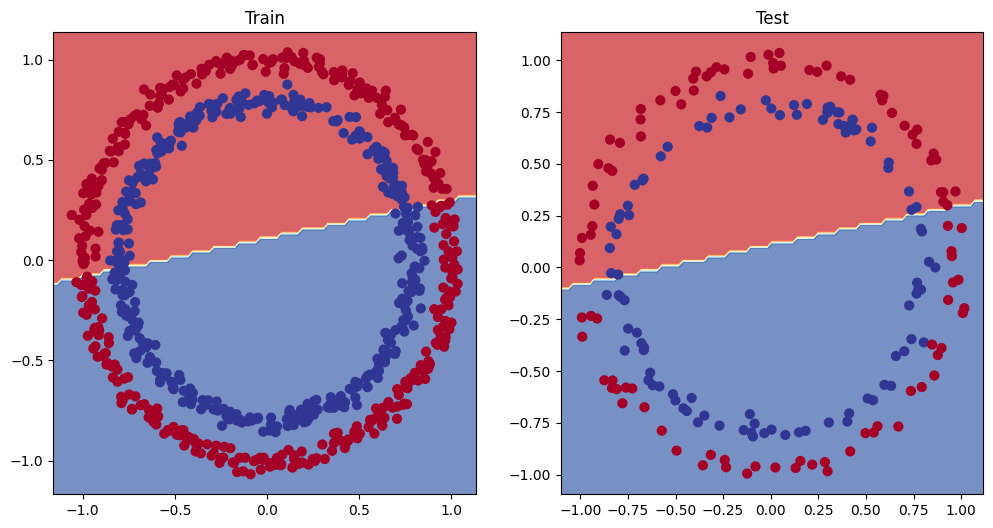

In [176]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### Improving a model

In [177]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,
                             out_features=128)
    self.activation = nn.ReLU()
    self.layer_2 = nn.Linear(in_features=128,
                             out_features=64)
    self.layer_3 = nn.Linear(in_features=64,
                             out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_3(self.activation(self.layer_2(self.activation(self.layer_1(x)))))

model_1 = CircleModelV1().to(device)


In [178]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [179]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    if epoch % 100 == 0:
       print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69552 | Acc: 50.00 | Test loss: 0.69526, Test acc: 50.00%
Epoch: 100 | Loss: 0.67327 | Acc: 69.38 | Test loss: 0.67680, Test acc: 62.00%
Epoch: 200 | Loss: 0.62450 | Acc: 97.12 | Test loss: 0.63599, Test acc: 94.50%
Epoch: 300 | Loss: 0.48790 | Acc: 99.50 | Test loss: 0.51941, Test acc: 97.00%
Epoch: 400 | Loss: 0.27061 | Acc: 99.88 | Test loss: 0.31847, Test acc: 99.50%
Epoch: 500 | Loss: 0.14518 | Acc: 99.88 | Test loss: 0.18900, Test acc: 99.50%
Epoch: 600 | Loss: 0.07835 | Acc: 100.00 | Test loss: 0.11314, Test acc: 100.00%
Epoch: 700 | Loss: 0.05010 | Acc: 100.00 | Test loss: 0.07906, Test acc: 100.00%
Epoch: 800 | Loss: 0.03559 | Acc: 100.00 | Test loss: 0.06045, Test acc: 100.00%
Epoch: 900 | Loss: 0.02711 | Acc: 100.00 | Test loss: 0.04896, Test acc: 100.00%


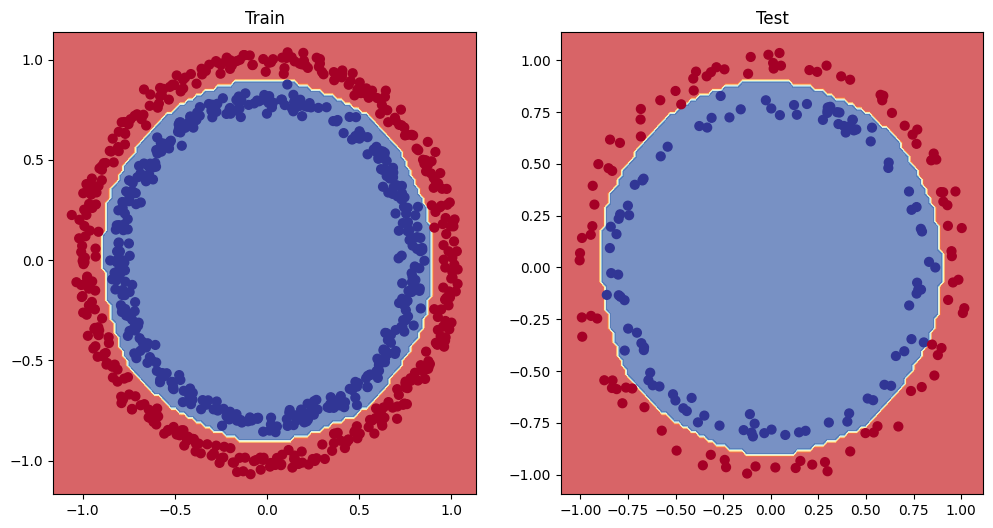

In [180]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### Multiclass classification


In [181]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [182]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

X_blob

array([[-8.41339595,  6.93516545],
       [-5.76648413, -6.43117072],
       [-6.04213682, -6.76610151],
       ...,
       [ 3.2157805 ,  5.92174278],
       [-7.79389549, -7.16056655],
       [-9.6815798 ,  7.0096901 ]])

In [183]:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)


X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

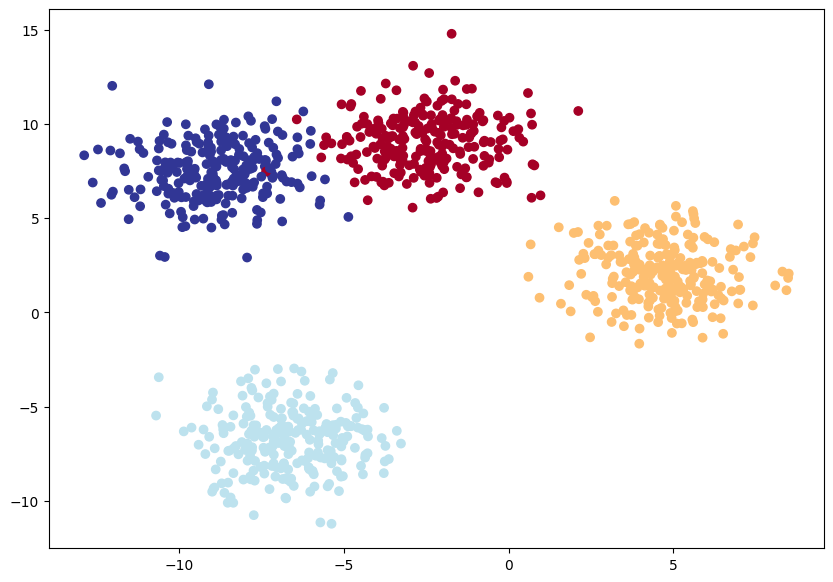

In [184]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

### Multiclass Classification Model

In [185]:
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [186]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()

    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_features)
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [187]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

In [188]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device);
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device);

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)

  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train)

  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_4.eval()

  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_preds)

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}%")



Epoch: 0 | Loss: 1.1588, Acc: 40.38%
Epoch: 10 | Loss: 0.6448, Acc: 96.75%
Epoch: 20 | Loss: 0.4254, Acc: 98.50%
Epoch: 30 | Loss: 0.2529, Acc: 99.12%
Epoch: 40 | Loss: 0.1123, Acc: 99.25%
Epoch: 50 | Loss: 0.0663, Acc: 99.25%
Epoch: 60 | Loss: 0.0507, Acc: 99.25%
Epoch: 70 | Loss: 0.0430, Acc: 99.25%
Epoch: 80 | Loss: 0.0384, Acc: 99.25%
Epoch: 90 | Loss: 0.0352, Acc: 99.25%


In [190]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [193]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

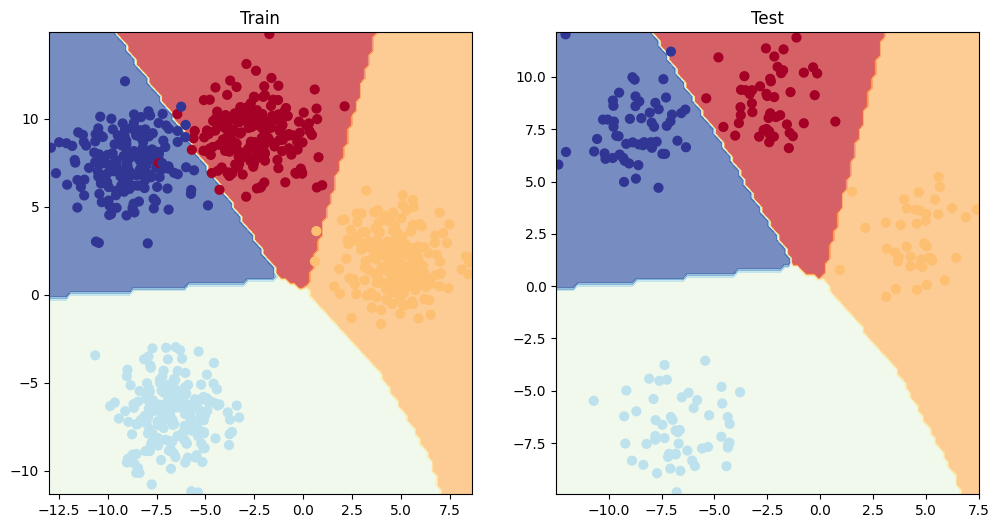

In [195]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)